In [1]:
import sys
import numpy as np
import os
import matplotlib.pyplot as plt

import mcg
import mdtraj as md
import time
import pandas as pd

In [10]:
mu = 180
run = 0
idx = 2
stride = 1
burst = 1e5

In [11]:
folder = f"data_mu{mu}/unfinished/run{run}/"

conffolder = "gro_files"

In [13]:
# Input files
dcd_file = os.path.join(folder, f"traj_{idx}.dcd")
topology_file = os.path.join(conffolder, "conf.gro")


# Load the trajectory with a stride of n (e.g., every 10th frame)
n = stride  # Change this to the desired interval
traj = md.load(dcd_file, top=topology_file, stride=n)
original_frame_indices = np.arange(traj.n_frames) * n

traj.time = np.arange(0, traj.n_frames) * burst * n

print(f"Trajectory loaded using every {n}th step")


Trajectory loaded using every 1th step


In [24]:
print(traj)
print(np.shape(traj.unitcell_vectors))

<mdtraj.Trajectory with 1784 frames, 13312 atoms, 3456 residues, and unitcells>
(1784, 3, 3)


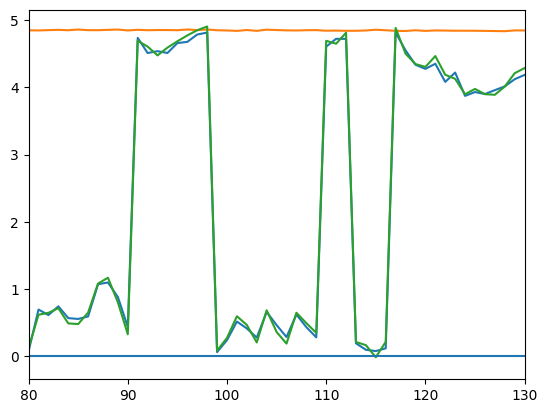

In [47]:
plt.plot(traj.xyz[:, 0, 0])
plt.plot(traj.unitcell_vectors[:, 0, 0])
plt.plot(traj.xyz[:, 1, 0])

#plt.ylim(4.5,5)
plt.xlim(80,130)
plt.axhline(0)

In [53]:
print(max(traj.xyz[:, 0, 0] - traj.xyz[:, 1, 0]))

0.11586189


In [92]:
# Suppose your molecule corresponds to residue index 0 (first residue)
residue = traj.topology.residue(0)  
atom_indices = [atom.index for atom in residue.atoms]
print(f"Atoms in residue {residue}:")

for atom in residue.atoms:
    print(f"Atom index: {atom.index}, Name: {atom.name}, Element: {atom.element.symbol}")


# Extract positions of all atoms in this residue over all frames
positions = traj.xyz[:, atom_indices, :]  # shape: (n_frames, n_atoms_in_molecule, 3)


Atoms in residue UNL0:
Atom index: 0, Name: CO, Element: C
Atom index: 1, Name: OC, Element: O
Atom index: 2, Name: OC, Element: O


In [93]:
print(np.shape(positions))

(1784, 3, 3)


(80.0, 130.0)

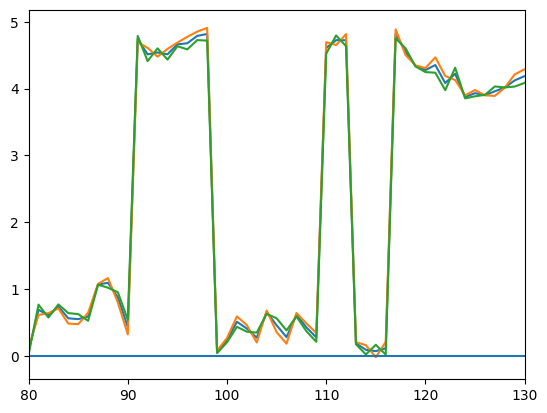

In [97]:
plt.plot(positions[:, 0, 0])
plt.plot(positions[:, 1, 0])
plt.plot(positions[:, 2, 0])

plt.axhline(0)
plt.xlim(80,130)

In [95]:
var = np.std(positions, axis = 2)

In [96]:
c_o_1 = max(positions[:, 0, 0] - positions[:, 1, 0])
c_o_2 = max(positions[:, 0, 0] - positions[:, 2, 0])
o_o = max(positions[:, 1, 0] - positions[:, 2, 0])

In [79]:
if c_o_1 < 0.116 and c_o_1 < 0.116 and o_o < 0.116+0.116:
    print('All good!')
else:
    print(c_o_1, c_o_1, o_o)

All good!


In [91]:
for i in range(traj.topology.n_residues):
    # Suppose your molecule corresponds to residue index 0 (first residue)
    residue = traj.topology.residue(i)  
    atom_indices = [atom.index for atom in residue.atoms]
    #print(f"Atoms in residue {residue}:")
    
    for atom in residue.atoms:
        #print(f"Atom index: {atom.index}, Name: {atom.name}, Element: {atom.element.symbol}")
        pass
    
    # Extract positions of all atoms in this residue over all frames
    positions = traj.xyz[:, atom_indices, :]  # shape: (n_frames, n_atoms_in_molecule, 3)
    
    c_o_1 = max(positions[:, 0, 0] - positions[:, 1, 0])
    c_o_2 = max(positions[:, 0, 0] - positions[:, 2, 0])
    o_o = max(positions[:, 1, 0] - positions[:, 2, 0])
    
    if c_o_1 < 0.116 and c_o_1 < 0.116 and o_o < 0.116+0.116:
        print('Full molecule!')
        pass
    else:
        print(c_o_1, c_o_1, o_o)

Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molecule!
Full molec